In [1]:
import numpy as np
import matplotlib.pyplot as plt

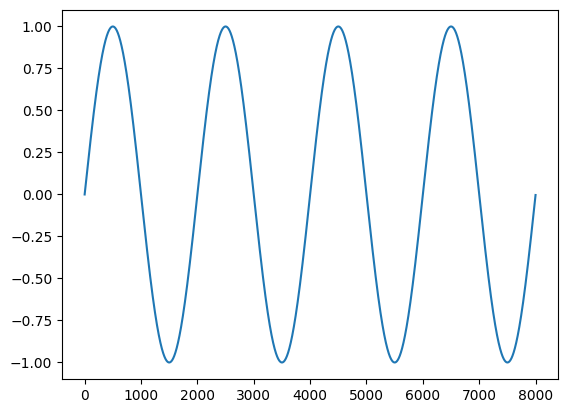

In [2]:
t = [i/2000 for i in range(4*2000)]
sig = [np.sin(x*2*np.pi) for x in t]
plt.plot(sig)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


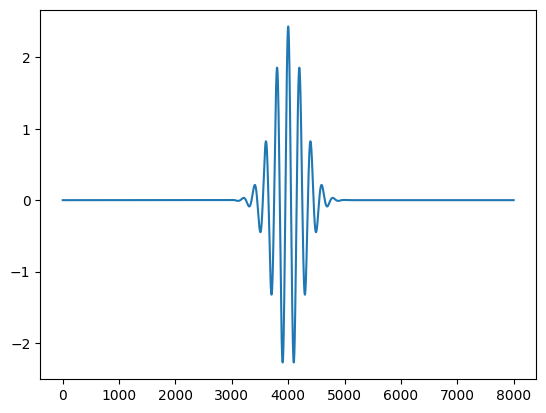

In [3]:
peak_freq=10
fs=2000
n=6

# generating our wavelet
f = peak_freq
t = np.arange(-2, 2 + 1/fs, 1/fs)
s = n/(2*np.pi*f)
wavelet = np.sqrt(1/(s*np.sqrt(np.pi)))*np.exp(2*np.pi*1j*f*t) * np.exp(-t**2/((2*s)**2))
plt.plot(wavelet, label='with scaling param')




In [4]:
np.nonzero(np.round(wavelet.real, 3) == 0.5)
np.abs(t[3775])+t[4225]

0.224999999999975

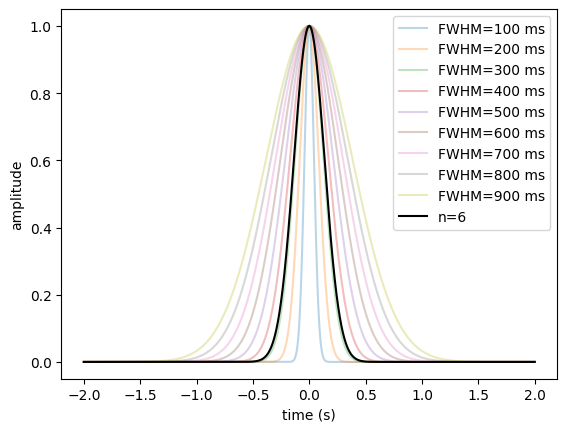

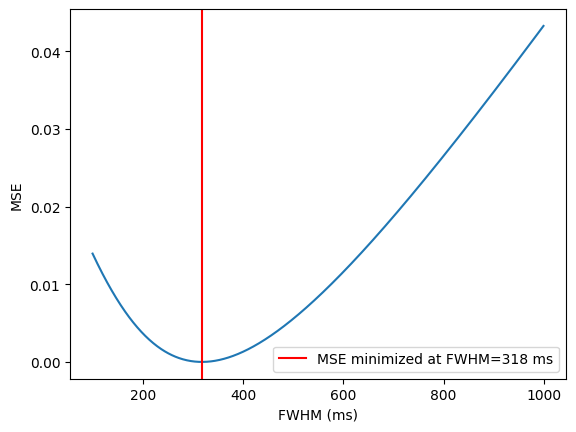

318


In [66]:
mse = []
for fwhm in np.arange(100,1000):
    fs = 2000 
    peak_freq = 10
    n = 6

    # generating our wavelet
    f = peak_freq
    t = np.arange(-2, 2 + 1/fs, 1/fs)
    s = n/(2*np.pi*f)
    wavelet_n = np.exp(2*np.pi*1j*f*t) * np.exp(-t**2/((2*s)**2))


    fs = 2000 
    peak_freq = 10
    h = fwhm / 1000

    f = peak_freq
    t = np.arange(-2, 2 + 1/fs, 1/fs)
    s = n/(2*np.pi*f)
    wavelet_fwhm = np.exp(2*np.pi*1j*f*t) * np.exp((-4*np.log(2)*t**2)/h**2)

    diff = (abs(wavelet_n.real - wavelet_fwhm.real))**2
    mse.append((np.sum(diff)/len(diff)))    #### MSE between wavelet of n=6, 
                                            #### and wavelet defined by given FWHM

    #plt.plot(t, wavelet_n, label='wavelet defined by n=6', color='black')
    if fwhm%100 == 0:
        plt.plot(t, abs(wavelet_fwhm), alpha=0.3, label=f'FWHM={fwhm} ms')

t = np.arange(-2, 2 + 1/fs, 1/fs)
plt.plot(t, abs(wavelet_n), label='n=6', c='k')
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.legend()
plt.show()

plt.plot(np.arange(100,1000), mse)
plt.xlabel('FWHM (ms)')
plt.ylabel('MSE')
plt.axvline(x=318, color='red', label='MSE minimized at FWHM=318 ms')
plt.legend()
plt.show()

min_index = np.argmin(mse)
print(np.arange(100,1000)[min_index])

0.00033661164293519267


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


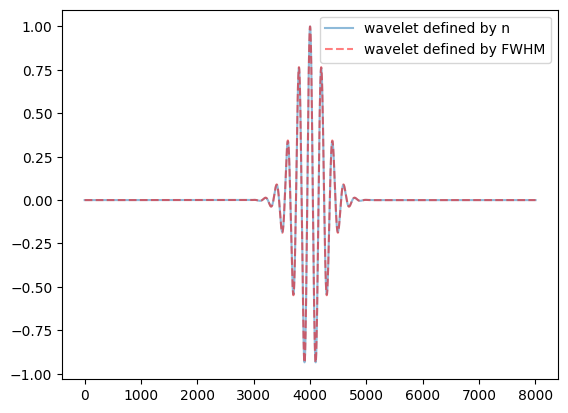

In [86]:
fs = 2000 
peak_freq = 10
n = 6

# generating our wavelet
f = peak_freq
t = np.arange(-2, 2 + 1/fs, 1/fs)
s = n/(2*np.pi*f)
wavelet_n = np.exp(2*np.pi*1j*f*t) * np.exp(-t**2/((2*s)**2))

fs = 2000 
peak_freq = 10
h = 3200/peak_freq/1000

f = peak_freq
t = np.arange(-2, 2 + 1/fs, 1/fs)
s = n/(2*np.pi*f)
wavelet_fwhm = np.exp(2*np.pi*1j*f*t) * np.exp((-4*np.log(2)*t**2)/h**2)

diff = abs(wavelet_n.real) - abs(wavelet_fwhm.real)
print(np.sum(abs(diff))/len(diff))

plt.plot(wavelet_n, label='wavelet defined by n', alpha=0.5)
plt.plot(wavelet_fwhm, '--r', alpha=0.5, label='wavelet defined by FWHM')
plt.legend()
plt.show()

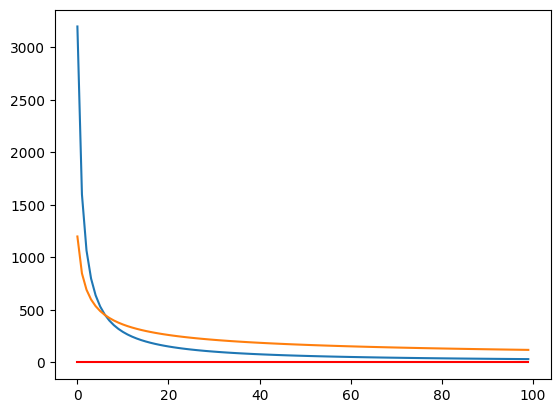

In [16]:
freqs = np.arange(1,101)
fwhms = [3200/f for f in freqs]
plt.plot(fwhms)

fwhms = [3600/(3*(f**(1/2))) for f in freqs]
plt.plot(fwhms)
plt.plot([0 for i in range(len(freqs))], c='r')
plt.show()

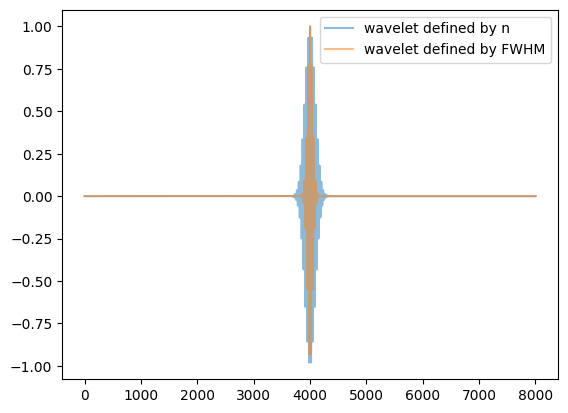

In [17]:
fs = 2000 
peak_freq = 60
n = 12

# generating our wavelet
f = peak_freq
t = np.arange(-2, 2 + 1/fs, 1/fs)
s = n/(2*np.pi*f)
wavelet_n = np.exp(2*np.pi*1j*f*t) * np.exp(-t**2/((2*s)**2))


fs = 2000 
peak_freq = 60
h = 3200/(peak_freq)/ 1000

f = peak_freq
t = np.arange(-2, 2 + 1/fs, 1/fs)
s = n/(2*np.pi*f)
wavelet_fwhm = np.exp(2*np.pi*1j*f*t) * np.exp((-4*np.log(2)*t**2)/h**2)

plt.plot(wavelet_n, label='wavelet defined by n', alpha=0.5)
plt.plot(wavelet_fwhm, label='wavelet defined by FWHM', alpha=0.5)
plt.legend()
plt.show()

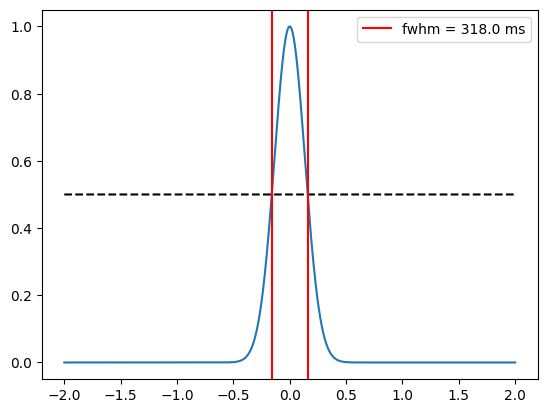

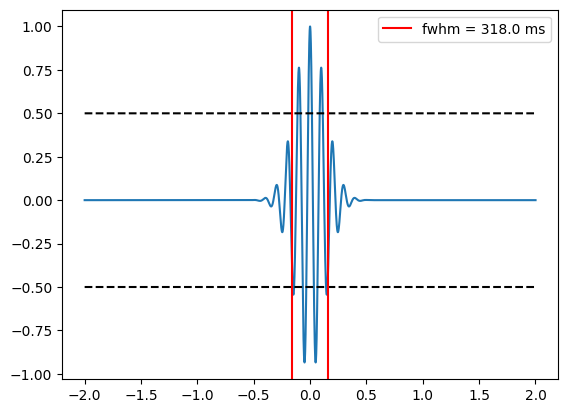

In [18]:
def get_wavelet_empirical_fwhm(f, n_cycles):
    fs = 2000 
    peak_freq = f
    n = n_cycles

    # generating our wavelet
    f = peak_freq
    t = np.arange(-2, 2 + 1/fs, 1/fs)
    s = n/(2*np.pi*f)
    wavelet_n = np.exp(2*np.pi*1j*f*t) * np.exp(-t**2/((2*s)**2))
    try:
        half_fwhm = abs(t[np.round(abs(wavelet_n),4) == 0.5][0])
    except:
        try:
            half_fwhm = abs(t[np.round(abs(wavelet_n),3) == 0.5][0])
        except:
            try:
                half_fwhm = abs(t[np.round(abs(wavelet_n),2) == 0.5][0])
            except:
                half_fwhm = abs(t[np.round(abs(wavelet_n),1) == 0.5][0])

    return wavelet_n, half_fwhm

wavelet, half_fwhm = get_wavelet_empirical_fwhm(10,6)

t = np.arange(-2, 2 + 1/2000, 1/2000)
plt.plot(t, abs(wavelet))
plt.plot(t, [0.5 for i in range(len(t))], '--k')
#plt.plot([-0.5 for i in range(len(t))])
plt.axvline(x=-half_fwhm, color='red', label=f'fwhm = {np.round(half_fwhm*2,3)*1000} ms')
plt.axvline(x=half_fwhm, color='red')
plt.legend()
plt.show()

t = np.arange(-2, 2 + 1/2000, 1/2000)
plt.plot(t, wavelet.real)
plt.plot(t, [0.5 for i in range(len(t))], '--k')
plt.plot(t, [-0.5 for i in range(len(t))], '--k')
plt.axvline(x=-half_fwhm, color='red', label=f'fwhm = {np.round(half_fwhm*2,3)*1000} ms')
plt.axvline(x=half_fwhm, color='red')
plt.legend()
plt.show()


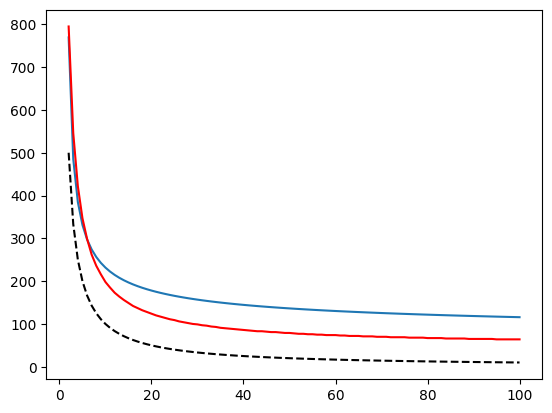

In [28]:
freqs = np.arange(2,101)
ns = np.linspace(3,12, len(freqs))  
n_dict = dict(zip(freqs, ns))

empirical_fwhm = []
for f in freqs:
    w, half_width = get_wavelet_empirical_fwhm(f, n_dict[f])
    empirical_fwhm.append(half_width*2*1000)

fwhms = [3200/(6*np.log(f)) for f in freqs]

plt.plot(freqs, fwhms)
plt.plot(freqs, empirical_fwhm, 'r')
plt.plot(freqs, [1/f*1000 for f in freqs], '--k')

plt.show()